# Original Isolation Forest

## Imports

In [1]:
import pandas as pd
import numpy as np
import gd as gd
import math
from random import randint
from sklearn.ensemble import IsolationForest

## Setup Dataset

In [2]:
COLUMN = 'Global_active_power'
DEVIATION_BITS = 2
DATA = 'data/household_power_consumption.csv'
COLUMNS = ['Global_active_power']
DATA_TYPES = {'Global_active_power': 'single'}
NA_VALUES = '?'
SEPARATOR = ';'
SAMPLE_SIZE = 1440
MULTIPLIER = 10
MAX_ERROR_MARGIN = 0
SAVE_RESULTS = True

In [3]:
df = pd.read_csv(DATA, sep=SEPARATOR, usecols=COLUMNS, dtype=DATA_TYPES, na_values=NA_VALUES)

start_index = randint(0, len(df.index) - SAMPLE_SIZE - 1)
if (SAMPLE_SIZE == 0):
    df_original = df.copy()
else:
    df_original = df[start_index:start_index + SAMPLE_SIZE].copy()

df_original.dropna(inplace=True)
df_int = df_original.copy()
df_int[COLUMN] = df_int[COLUMN].apply(lambda x: int(x * MULTIPLIER))
df_int.sort_values(COLUMN)

,Global_active_power
831891,1
831625,1
831591,1
831590,1
831589,1
...,...
832134,32
832136,32
832058,33
832057,33


In [4]:
NUMBER_OF_INDIVIDUAL_VALUES_ORIGINAL = len(df_int.groupby(by=COLUMN).size().index)
NUMBER_OF_VALUES_ORIGINAL = len(df_int.index)
HIGHEST_VALUE_COUNT_ORIGINAL = df_int.groupby(by=COLUMN).size().max()
HIGHEST_VALUE_ORIGINAL = df_int[COLUMN].max()
NUMBER_OF_BITS = math.ceil(math.log(HIGHEST_VALUE_ORIGINAL, 2))
ORIGINAL_FILE_SIZE = NUMBER_OF_VALUES_ORIGINAL * 32
ORIGINAL_FILE_SIZE_INT = NUMBER_OF_VALUES_ORIGINAL * NUMBER_OF_BITS
# df_int.groupby(by=COLUMN).size(),
NUMBER_OF_BITS

6

<AxesSubplot:ylabel='Density'>

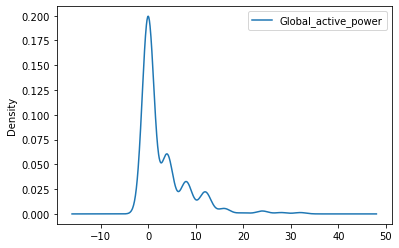

In [5]:
df_compressed = df_int.copy()
df_compressed[COLUMN] = df_compressed[COLUMN].apply(lambda x: gd.compress_int(x, deviation_bits=DEVIATION_BITS, output="integer"))
df_compressed.plot.density()

In [6]:
bases = df_compressed.groupby(by=COLUMN, as_index=False).size()
bases

,Global_active_power,size
0,0,882
1,4,263
2,8,143
3,12,98
4,16,24
5,20,5
6,24,13
7,28,6
8,32,6


## Isolation Forest 

In [7]:
X = df_compressed.to_numpy()
clf = IsolationForest(random_state=0).fit(X)
#clf.predict([[1], [2], [7], [1500]])
clf.decision_function([[1],[2]])


array([0.03734493, 0.02545465])

In [8]:
clf.score_samples([[1],[2]])

array([-0.46265507, -0.47454535])

## ISOLATION FOREST Scitkit Learn example

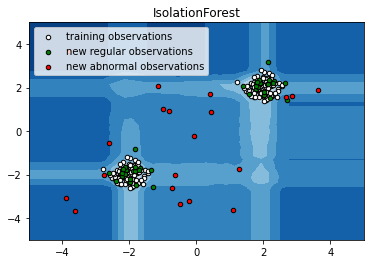

(200, 2)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()
X_train.shape

## Local Outlier Factor Scitkit Learn example

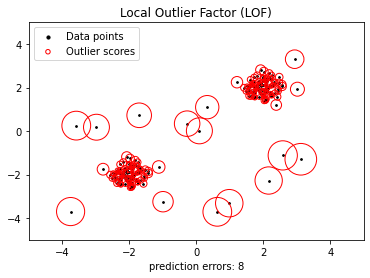

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()
